In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-drop-out-prediction/train.csv
/kaggle/input/students-drop-out-prediction/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Reading the train & test files

In [4]:
traindata = pd.read_csv('../input/students-drop-out-prediction/train.csv')
testdata = pd.read_csv('../input/students-drop-out-prediction/test.csv')

print(traindata.shape)
print(testdata.shape)
print()
print(testdata.shape[0]/(traindata.shape[0]+testdata.shape[0]))

(3796, 43)
(1628, 42)

0.3001474926253687


In [5]:
features = traindata.iloc[:,0:-1]
label = traindata.iloc[:,-1]

train_x,val_x,train_y,val_y = train_test_split(features,label,test_size=0.2,random_state=0)

## Understanding the training data 

In [6]:
print(train_x.shape)
print(val_x.shape)
print(train_y.shape)
print(val_y.shape)

(3036, 42)
(760, 42)
(3036,)
(760,)


In [7]:
train_x.head()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
628,628,3,6,11,148,1,1,16,110,6,...,10.8,1.4,1.74,2,12,1,4,15,28,3
1670,1670,4,6,10,20,0,1,16,181,251,...,10.8,1.4,1.74,9,9,37,1,54,33,1
330,330,4,50,10,167,0,17,16,218,69,...,11.1,0.6,2.02,5,51,10,4,18,67,2
1426,1426,3,6,10,96,1,1,16,110,168,...,7.6,2.6,0.32,7,97,16,23,11,21,2
2590,2590,3,72,10,54,1,1,16,1,6,...,9.4,-0.8,-3.12,9,12,38,29,5,27,2


In [8]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3036 entries, 628 to 2732
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3036 non-null   int64  
 1   v_21    3036 non-null   int64  
 2   v_32    3036 non-null   int64  
 3   v_15    3036 non-null   int64  
 4   v_4     3036 non-null   int64  
 5   v_1     3036 non-null   int64  
 6   v_8     3036 non-null   int64  
 7   v_12    3036 non-null   int64  
 8   v_25    3036 non-null   int64  
 9   v_20    3036 non-null   int64  
 10  v_18    3036 non-null   int64  
 11  v_3     3036 non-null   int64  
 12  v_11    3036 non-null   int64  
 13  v_14    3036 non-null   int64  
 14  v_26    3036 non-null   int64  
 15  v_27    3036 non-null   int64  
 16  v_30    3036 non-null   int64  
 17  v_9     3036 non-null   int64  
 18  v_31    3036 non-null   int64  
 19  v_28    3036 non-null   int64  
 20  v_13    3036 non-null   int64  
 21  v_33    3036 non-null   int64  
 22

In [9]:
train_x.describe()

,id,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
count,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.00000,3036.000000,3036.000000,3036.000000,...,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,1908.256588,4.824440,71.333992,11.585968,100.010540,0.907444,3.43643,18.989130,98.516469,166.527997,...,12.399111,2.041996,0.811008,5.333004,50.404150,26.032609,20.796113,31.368906,40.496706,3.269104
std,1089.981141,6.074589,55.984428,2.568762,45.023646,0.289857,4.56015,14.927818,79.153874,103.004775,...,3.425179,2.515395,3.099194,3.512854,29.396484,14.975386,12.033873,17.920940,22.520450,2.626135
min,0.000000,3.000000,6.000000,9.000000,9.000000,0.000000,1.00000,16.000000,1.000000,6.000000,...,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,972.750000,3.000000,6.000000,10.000000,56.750000,1.000000,1.00000,16.000000,5.000000,60.000000,...,9.400000,0.500000,-1.700000,3.000000,24.750000,13.000000,10.000000,16.000000,22.000000,1.000000
50%,1914.500000,3.000000,89.000000,10.000000,102.000000,1.000000,1.00000,16.000000,110.000000,168.000000,...,12.400000,1.400000,0.790000,5.000000,50.000000,26.000000,21.000000,32.000000,41.500000,3.000000
75%,2846.250000,4.000000,116.000000,12.000000,146.000000,1.000000,3.00000,16.000000,181.000000,251.000000,...,14.825000,2.800000,2.020000,8.000000,76.000000,39.000000,31.000000,47.000000,59.250000,5.000000
max,3795.000000,59.000000,176.000000,25.000000,176.000000,1.000000,24.00000,177.000000,274.000000,322.000000,...,25.200000,12.700000,12.510000,18.000000,107.000000,58.000000,49.000000,69.000000,87.000000,14.000000


<AxesSubplot:>

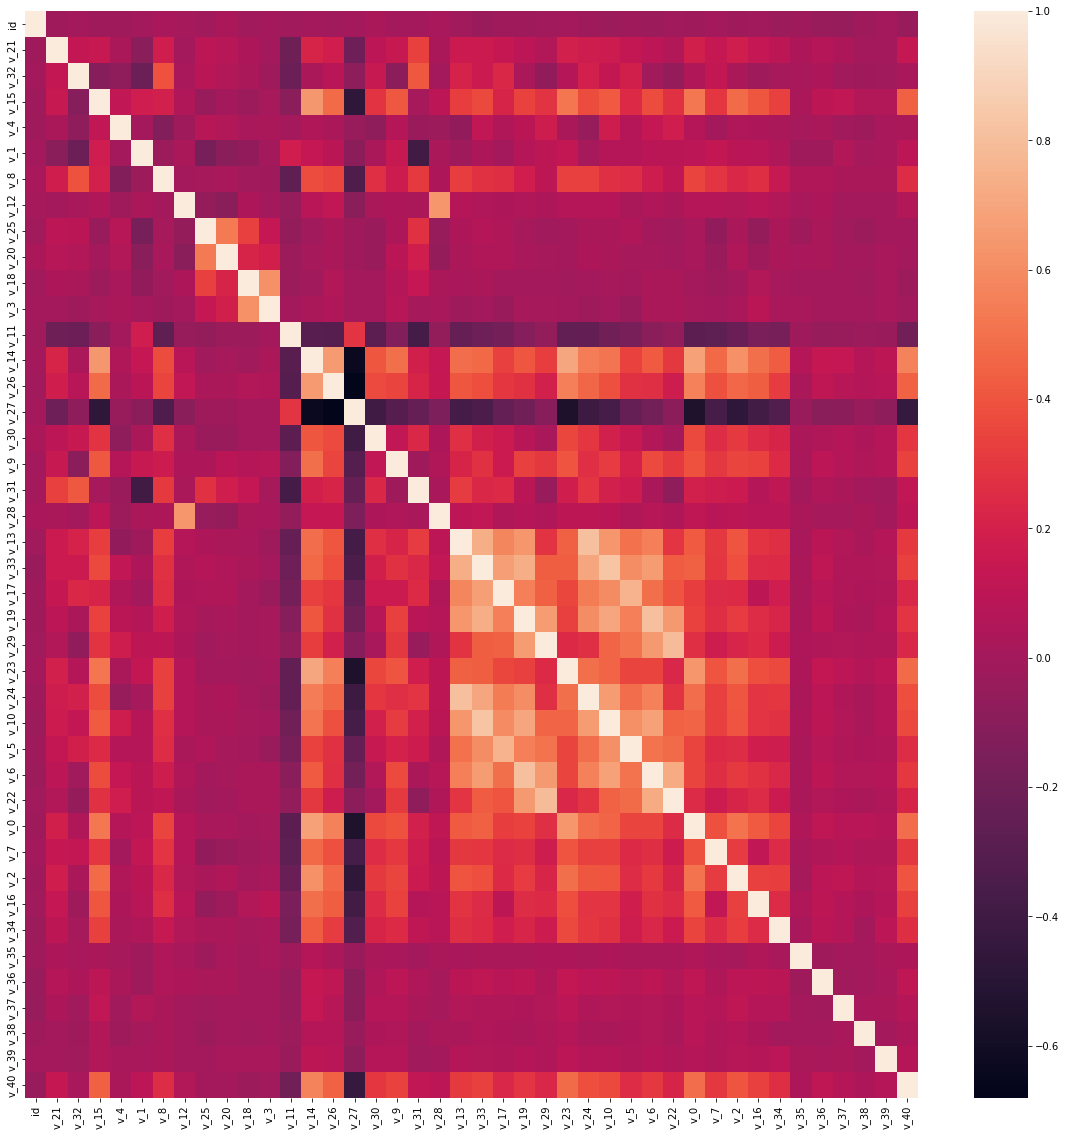

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(train_x.corr())

<AxesSubplot:>

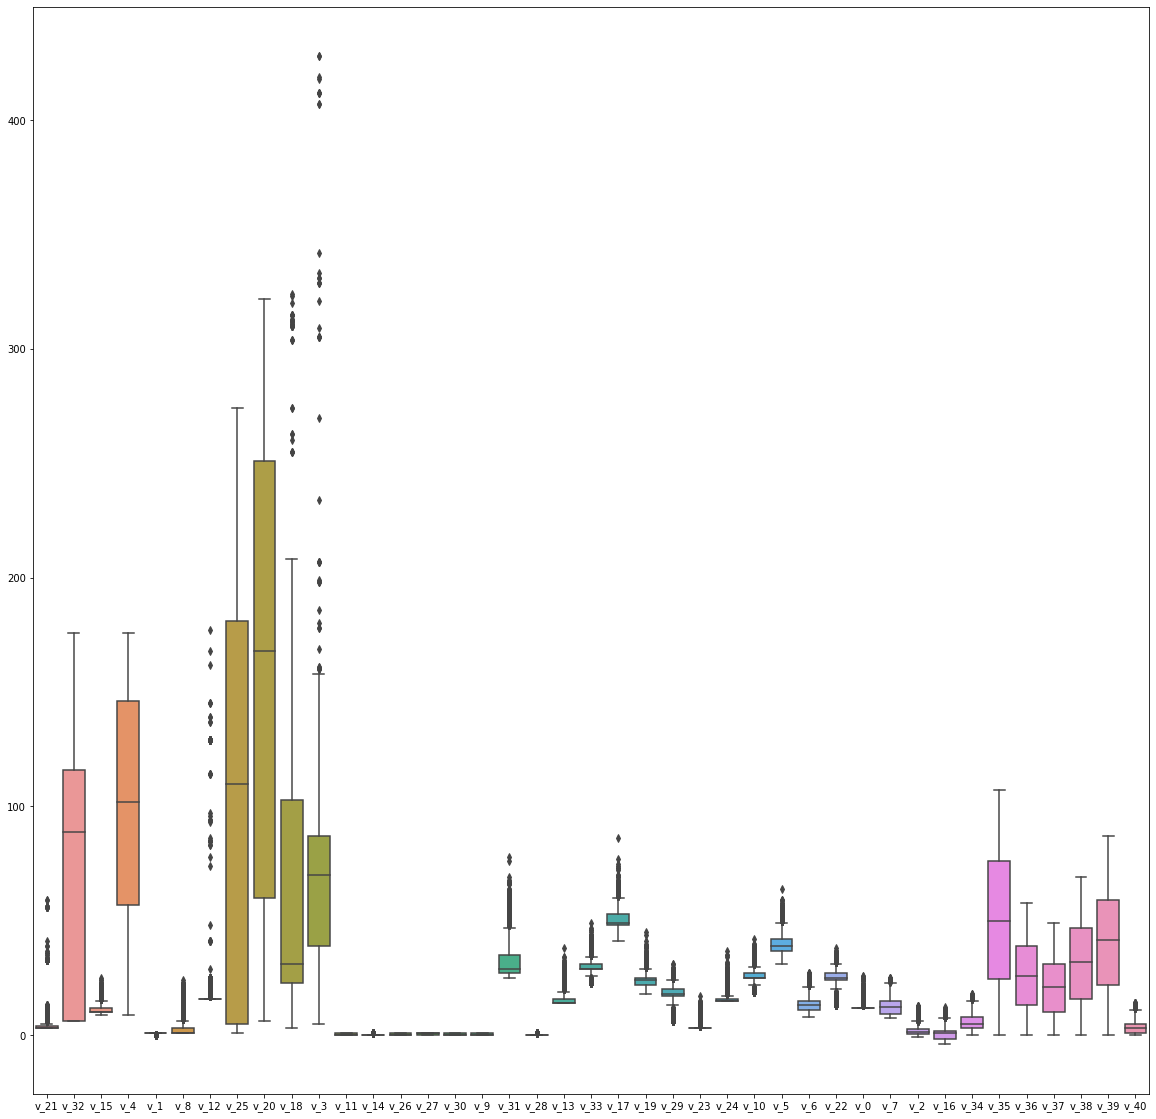

In [11]:
plt.figure(figsize = (20,20))
sns.boxplot(data = train_x.iloc[:, 1:])

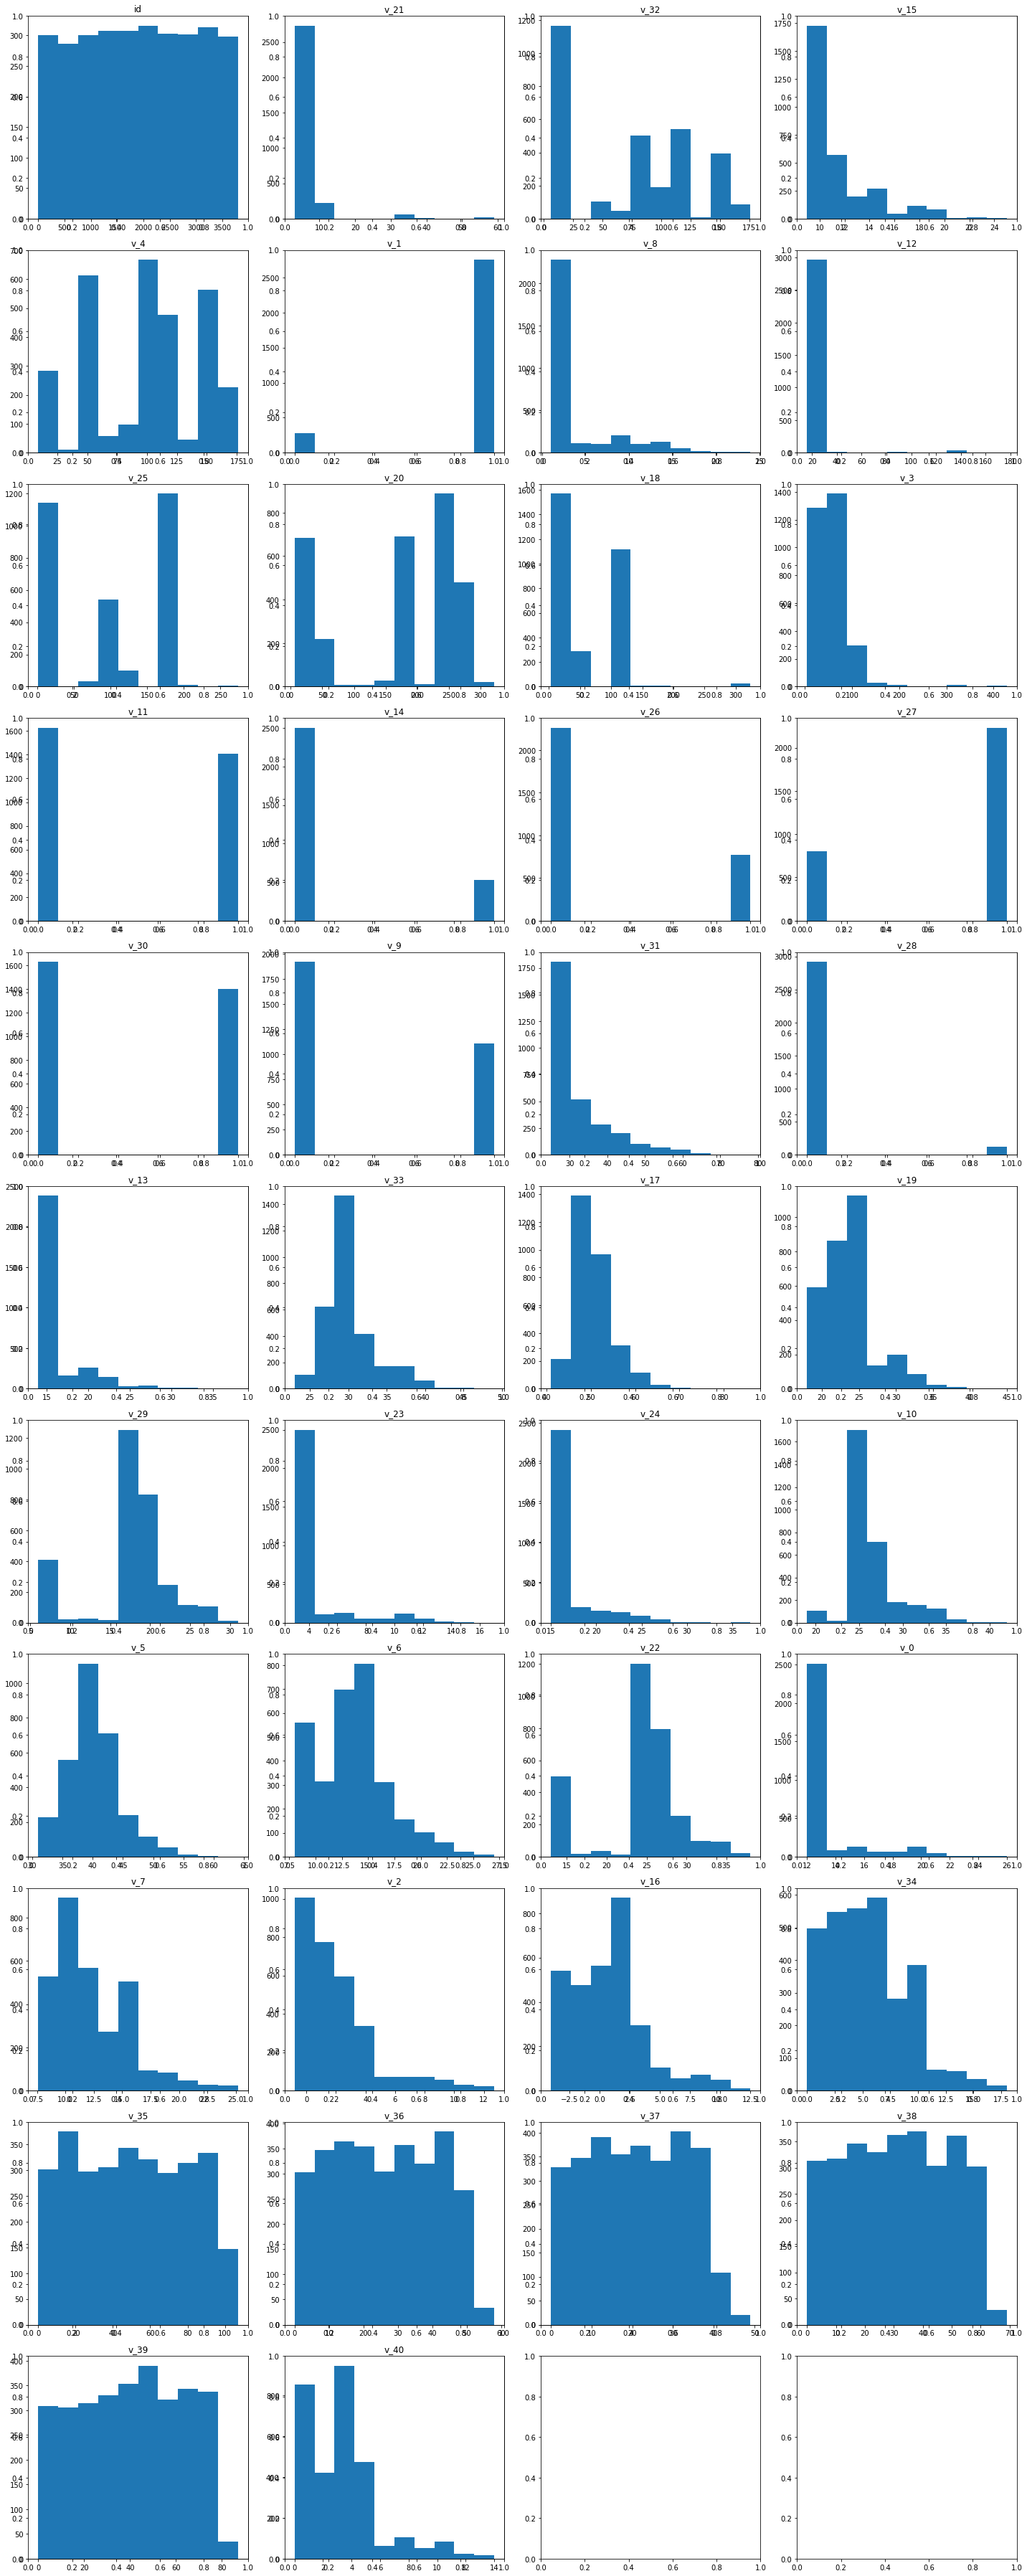

In [12]:
fig, axs = plt.subplots(nrows=11, ncols=4)
fig.set_size_inches(20, 50)

for i in range(len(train_x.columns)):
    fig.add_subplot(11,4,i+1)
    fig.tight_layout()
    plt.hist(train_x[train_x.columns[i]])
    plt.title(train_x.columns[i])

1    1503
0     994
2     539
Name: label, dtype: int64


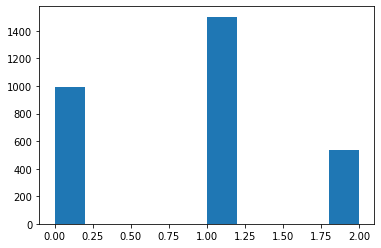

In [13]:
print(train_y.value_counts())

plt.hist(train_y)
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
train_x,train_y = oversample.fit_resample(train_x,train_y)

1    1503
0    1503
2    1503
Name: label, dtype: int64


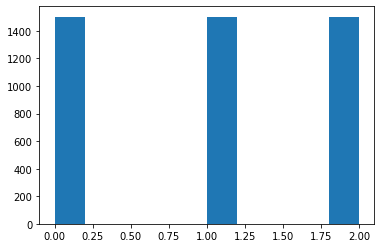

In [15]:
print(train_y.value_counts())

plt.hist(train_y)
plt.show()

## Creating the pipeline with Pre-processing steps and Dummy Classifier

In [16]:
from sklearn.model_selection import cross_validate, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
basepipe = Pipeline(steps=[('ss',StandardScaler()),('estimator',DummyClassifier())])

basepipe.fit(train_x,train_y)

f1_score = cross_validate(basepipe,train_x,train_y,scoring='f1_macro',cv=10)
f1_score['test_score'].mean()

0.16641708264004437

## Trying out Naive Bayes, Logistic Regression, Decision Tree Classifier and SGD Classifier with hyper parameter tuning

In [18]:
## Gaussian Naive Bayes with standard scaling

gnb_pipe= Pipeline([('ss',StandardScaler()),('estimator',GaussianNB())])
gnb_cv = cross_validate(gnb_pipe,train_x,train_y, scoring='f1_macro', cv=10,return_train_score=True)
print(gnb_cv['train_score'].mean())
print(gnb_cv['test_score'].mean())

0.518033142834812
0.5157516827915727


In [19]:
## logistic regression with standard scaling

lr_pipe= Pipeline([('ss',StandardScaler()),('estimator',LogisticRegression())])
lr_cv = cross_validate(lr_pipe,train_x,train_y, scoring='f1_macro', cv=10,return_train_score=True)
print(lr_cv['train_score'].mean())
print(lr_cv['test_score'].mean())

0.7329231314961524
0.7184207911830607


In [20]:
## Logistic regression with hyper parameter tuning
LR_params =  {'estimator__penalty':['l1','l2'],'estimator__C':np.logspace(-4,4,10),'estimator__solver':['saga','liblinear']}
LR_grid = GridSearchCV(lr_pipe,LR_params, scoring='f1_macro', cv=10, n_jobs=-1)
LR_grid.fit(train_x,train_y)
print('best estimator:')
print(LR_grid.best_estimator_)
print('best score:')
print(LR_grid.best_score_)

best estimator:
Pipeline(steps=[('ss', StandardScaler()),
                ('estimator',
                 LogisticRegression(C=0.3593813663804626, penalty='l1',
                                    solver='saga'))])
best score:
0.7185611934887471


In [21]:
LR_cr= classification_report(val_y, LR_grid.predict(val_x))
print(LR_cr)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       249
           1       0.77      0.82      0.80       360
           2       0.50      0.48      0.49       151

    accuracy                           0.73       760
   macro avg       0.69      0.68      0.68       760
weighted avg       0.73      0.73      0.73       760



In [22]:
## Decision tree classifier
dt= DecisionTreeClassifier()
dt_cv = cross_validate(dt,train_x,train_y, scoring='f1_macro', cv=10,return_train_score=True)
print(dt_cv['train_score'].mean())
print(dt_cv['test_score'].mean())

1.0
0.6628011135177893


In [23]:
## tuning Decision tree classifier

DT_params=  {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[5,8,15,25,30,50,70,None],'min_samples_leaf':[1,2,5,8,10,100],'min_samples_split':[2,6,10,20,40,80,100,120],'max_features':[2,5,10,'auto','sqrt','log2',None]}
DT_rs = RandomizedSearchCV(dt,DT_params, scoring= 'f1_macro', cv= 10)
DT_rs.fit(train_x,train_y)
print('best estimator:')
print(DT_rs.best_estimator_)
print('best score:')
print(DT_rs.best_score_)

best estimator:
DecisionTreeClassifier(max_depth=70, min_samples_leaf=8, min_samples_split=10)
best score:
0.673802946215112


In [24]:
DT_cr= classification_report(val_y, DT_rs.predict(val_x))
print(DT_cr)

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       249
           1       0.73      0.78      0.76       360
           2       0.38      0.32      0.35       151

    accuracy                           0.66       760
   macro avg       0.60      0.60      0.60       760
weighted avg       0.65      0.66      0.66       760



In [25]:
## SGD classifier

sgd = SGDClassifier()
sgd_cv = cross_validate(sgd,train_x,train_y,scoring='f1_macro',cv=5,return_train_score=True)
print(sgd_cv['train_score'].mean())
print(sgd_cv['test_score'].mean())

0.4448193983330639
0.44879633570725075


In [26]:
## SGD classifier with standard scaling

sgd_pipe= Pipeline([('ss',StandardScaler()),('estimator',SGDClassifier())])
sgd_cv = cross_validate(sgd_pipe,train_x,train_y, scoring='f1_macro', cv=10,return_train_score=True)
print(sgd_cv['train_score'].mean())
print(sgd_cv['test_score'].mean())

0.6930378979949017
0.67660653265406


In [27]:
## SGD classifier with hyperparameter tuning
sgd_params= {'estimator__loss':['modified_huber','squared_error','hinge'], 'estimator__penalty':['l1','l2'], 'estimator__alpha':[0.1,0.01,0.001], 'estimator__max_iter':[5000]}
sgd_rs = RandomizedSearchCV(sgd_pipe,sgd_params,scoring='f1_macro',cv=5,n_jobs=-1)
sgd_rs.fit(train_x,train_y)
print('best estimator:')
print(sgd_rs.best_estimator_)
print('best score:')
print(sgd_rs.best_score_)

best estimator:
Pipeline(steps=[('ss', StandardScaler()),
                ('estimator',
                 SGDClassifier(alpha=0.01, loss='modified_huber',
                               max_iter=5000))])
best score:
0.7034740557668855


In [28]:
sgd_cr= classification_report(val_y, sgd_rs.predict(val_x))
print(sgd_cr)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       249
           1       0.74      0.81      0.78       360
           2       0.48      0.44      0.46       151

    accuracy                           0.71       760
   macro avg       0.67      0.65      0.66       760
weighted avg       0.70      0.71      0.70       760



## Trying out KNN and SVM with hyper parameter tuning

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 

In [30]:
## knn with standard scaling

knn_pipe= Pipeline(steps = [('ss',StandardScaler()),('estimator',KNeighborsClassifier())])

knn_f1 = cross_validate(knn_pipe,train_x,train_y,scoring='f1_macro',cv=5, return_train_score=True)
print(knn_f1['train_score'].mean())
print(knn_f1['test_score'].mean())

0.8204686036674806
0.7081763390471731


In [31]:
## tuning knn

knn_params = {'estimator__n_neighbors':[2,5,10,15],'estimator__weights':['uniform','distance'],'estimator__p':[1,2]}
knn_rs = RandomizedSearchCV(knn_pipe,knn_params,scoring='f1_macro',cv=5,n_jobs=-1)
knn_rs.fit(train_x,train_y)
print('best estimator:')
print(knn_rs.best_estimator_)
print('best score:')
print(knn_rs.best_score_)

best estimator:
Pipeline(steps=[('ss', StandardScaler()),
                ('estimator', KNeighborsClassifier(p=1, weights='distance'))])
best score:
0.7766838170698491


In [32]:
knn_cr= classification_report(val_y, knn_rs.predict(val_x))
print(knn_cr)

              precision    recall  f1-score   support

           0       0.78      0.55      0.64       249
           1       0.70      0.80      0.75       360
           2       0.37      0.42      0.40       151

    accuracy                           0.64       760
   macro avg       0.62      0.59      0.60       760
weighted avg       0.66      0.64      0.64       760



In [33]:
#svc with standard scaling

svc_pipe= Pipeline(steps=[('ss',StandardScaler()),('svc',SVC())])

svc_f1 = cross_validate(svc_pipe,train_x,train_y,scoring='f1_macro',cv=5, return_train_score=True)
print(svc_f1['train_score'].mean())
print(svc_f1['test_score'].mean())

0.8731808488583823
0.7686402551821317


In [34]:
## tuning svc

svc_params= {'svc__C':[1,10,100],'svc__gamma':[1,0.1,0.001],'svc__kernel':['linear','rbf']}
svc_rs = RandomizedSearchCV(svc_pipe,svc_params,scoring='f1_macro',cv=5,n_jobs=-1,return_train_score=True)
svc_rs.fit(train_x,train_y)
print('best estimator:')
print(svc_rs.best_estimator_)
print('best score:')
print(svc_rs.best_score_)

best estimator:
Pipeline(steps=[('ss', StandardScaler()), ('svc', SVC(C=100, gamma=0.1))])
best score:
0.812417401930184


In [35]:
svc_cr= classification_report(val_y, svc_rs.predict(val_x))
print(svc_cr)

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       249
           1       0.71      0.86      0.78       360
           2       0.48      0.21      0.29       151

    accuracy                           0.69       760
   macro avg       0.64      0.61      0.60       760
weighted avg       0.67      0.69      0.67       760



## Trying out bagging & boosting methods

In [36]:
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [37]:
## bagging classifier

bag= BaggingClassifier()
bag_cv = cross_validate(bag,train_x,train_y,scoring='f1_macro',cv = 5,n_jobs=-1,return_train_score=True)
print(bag_cv['train_score'].mean())
print(bag_cv['test_score'].mean())

0.9895668962512918
0.7476606540707875


In [38]:
## tuning bagging classifier

Bag_params = {'n_estimators':[int(x) for x in np.linspace(200,2000,10)], 'max_samples':[0.1,0.2,0.3], 'max_features':[2,5,10,40]}
bag_rs = RandomizedSearchCV(bag,Bag_params,scoring='f1_macro',cv=10)
bag_rs.fit(train_x,train_y)
print('best estimator:')
print(bag_rs.best_estimator_)
print('best score:')
print(bag_rs.best_score_)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

best estimator:
BaggingClassifier(max_features=10, max_samples=0.3, n_estimators=1800)
best score:
0.7848572698633032


In [39]:
bag_cr= classification_report(val_y, bag_rs.predict(val_x))
print(bag_cr)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76       249
           1       0.73      0.90      0.81       360
           2       0.66      0.38      0.49       151

    accuracy                           0.74       760
   macro avg       0.73      0.67      0.68       760
weighted avg       0.74      0.74      0.73       760



In [40]:
## Gradient Boosting Classifier

gbc = GradientBoostingClassifier()
gbc_cv = cross_validate(gbc,train_x,train_y,scoring='f1_macro',cv=10,n_jobs=-1,return_train_score=True)
print(gbc_cv['train_score'].mean())
print(gbc_cv['test_score'].mean())

0.8555969098710186
0.7674440872733201


In [41]:
gbc.fit(train_x,train_y)

GradientBoostingClassifier()

In [42]:
gbc_cr= classification_report(val_y, gbc.predict(val_x))
print(gbc_cr)

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       249
           1       0.76      0.90      0.83       360
           2       0.61      0.47      0.53       151

    accuracy                           0.76       760
   macro avg       0.73      0.70      0.71       760
weighted avg       0.75      0.76      0.75       760



In [43]:
## random forest

rf= RandomForestClassifier()
rf_cv = cross_validate(rf,train_x,train_y,scoring='f1_macro',cv=10,n_jobs=-1,return_train_score=True) 
print(rf_cv['train_score'].mean())
print(rf_cv['test_score'].mean())

0.9999753633866331
0.8020399651887073


In [44]:
## tuning Random forest 

RF_params = {'n_estimators':[int(x) for x in np.linspace(100,1000,10)], 'criterion':['gini','entropy'],'max_depth':[5,8,15,25,30,50], 'min_samples_leaf':[1,2,5,8,10,100],'min_samples_split':[2,6,10,20,40,80,100,120],'max_features':[5,10,'sqrt',30]}
RF_rs = RandomizedSearchCV(rf,RF_params, scoring='f1_macro', cv=5, n_jobs=-1)
RF_rs.fit(train_x,train_y)
print('best estimator:')
print(RF_rs.best_estimator_)
print('best score:')
print(RF_rs.best_score_)

best estimator:
RandomForestClassifier(max_depth=15, max_features=30, n_estimators=700)
best score:
0.7818141493215929


In [45]:
RF_cr= classification_report(val_y, RF_rs.predict(val_x))
print(RF_cr)

              precision    recall  f1-score   support

           0       0.82      0.70      0.75       249
           1       0.74      0.89      0.80       360
           2       0.58      0.43      0.49       151

    accuracy                           0.73       760
   macro avg       0.71      0.67      0.68       760
weighted avg       0.73      0.73      0.73       760



In [46]:
rf.fit(train_x,train_y)
RF_cr= classification_report(val_y, rf.predict(val_x))
print(RF_cr)


              precision    recall  f1-score   support

           0       0.81      0.73      0.77       249
           1       0.74      0.89      0.81       360
           2       0.58      0.39      0.47       151

    accuracy                           0.74       760
   macro avg       0.71      0.67      0.68       760
weighted avg       0.73      0.74      0.73       760



In [47]:
## XGboost 

xgb= XGBClassifier()
xgb_cv = cross_validate(xgb,train_x,train_y,scoring='f1_macro',cv=10,n_jobs=-1,return_train_score=True)
print(xgb_cv['train_score'].mean())
print(xgb_cv['test_score'].mean())

1.0
0.8110066652727855


In [48]:
xgb.fit(train_x,train_y)
xgb_cr= classification_report(val_y, xgb.predict(val_x))
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       249
           1       0.75      0.90      0.82       360
           2       0.62      0.40      0.49       151

    accuracy                           0.75       760
   macro avg       0.72      0.68      0.69       760
weighted avg       0.74      0.75      0.74       760



In [49]:
xgb.fit(features,label)
xgb_pred= xgb.predict(testdata)

In [50]:
submission= pd.DataFrame({'id': testdata['id'], 'label': xgb_pred})
submission.to_csv('submission.csv',index=False )